<a href="https://colab.research.google.com/github/Indian-otaku/Keras_Programs/blob/main/keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
from keras.datasets import mnist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


(28, 28)


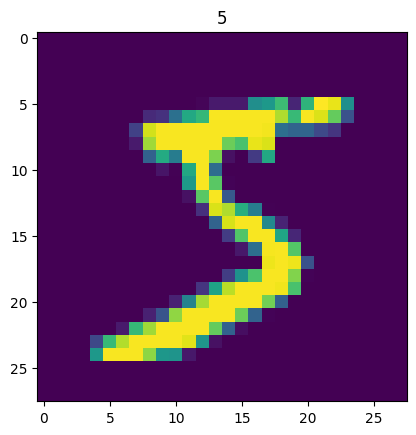

In [ ]:
image = x_train[0]
label = y_train[0]
print(image.shape)
plt.imshow(image)
plt.title(label)
plt.show()

In [ ]:
import random

for i in random.sample([i for i in range(len(x_train))], k=4):
    print(i)

12506
28437
41650
17531


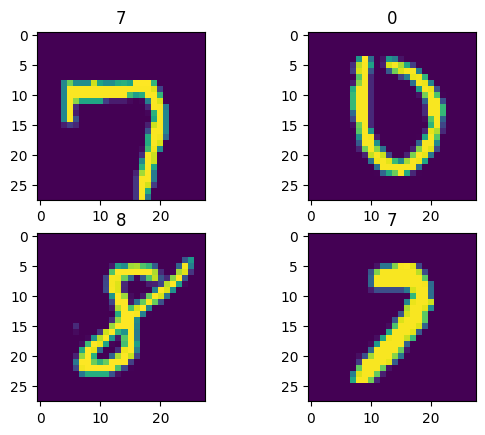

In [ ]:

for i, index in enumerate(random.sample(range(len(x_train)), k=4)):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_train[index])
    plt.title(y_train[index])
plt.show()

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_train_ohe = np.zeros((y_train.shape[0], 10))
for row, col in enumerate(y_train):
    y_train_ohe[row, col] = 1
y_test_ohe = np.zeros((y_test.shape[0], 10))
for row, col in enumerate(y_test):
    y_test_ohe[row, col] = 1

In [ ]:
import pandas as pd
pd.DataFrame(y_train_ohe)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
pd.Series(y_train)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8

In [ ]:
x_train_partial = x_train[:50000]
x_val = x_train[50000:]
y_train_partial = y_train_ohe[:50000]
y_val = y_train_ohe[50000:]

In [ ]:
print(x_train_partial.shape)
print(y_train_partial.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x=x_train_partial, 
                    y=y_train_partial,
                    epochs=100,
                    validation_data = (x_val, y_val),
                    use_multiprocessing=True,
                    workers=2,
                    verbose=0)

In [ ]:
print(history.history)
print(history.history.keys())

{'loss': [1.7468570470809937, 0.9056777954101562, 0.8527565002441406, 0.7910642027854919, 0.7562324404716492, 0.7283529043197632, 0.6814462542533875, 0.6746635437011719, 0.6628215909004211, 0.6801632642745972, 0.7283018827438354, 0.6828495264053345, 0.6857000589370728, 0.700090765953064, 0.6873813271522522, 0.7141047716140747, 0.7159945964813232, 0.7226600050926208, 0.7409102916717529, 0.7573041319847107, 0.7559051513671875, 0.7959225177764893, 0.7985461950302124, 0.8195981383323669, 0.7790809273719788, 0.7976754903793335, 0.8428571820259094, 0.7878002524375916, 0.7849698662757874, 0.7732293009757996, 0.8345711827278137, 0.7989307641983032, 0.7833560705184937, 0.8227015733718872, 0.8086251020431519, 0.7653416395187378, 0.8249617218971252, 0.8245194554328918, 0.8022403717041016, 0.7887797951698303, 0.8529363870620728, 0.8349440097808838, 0.8773322105407715, 0.8560535907745361, 0.8129038214683533, 0.8164337277412415, 0.8372663855552673, 0.806219756603241, 0.8222695589065552, 0.8824753165

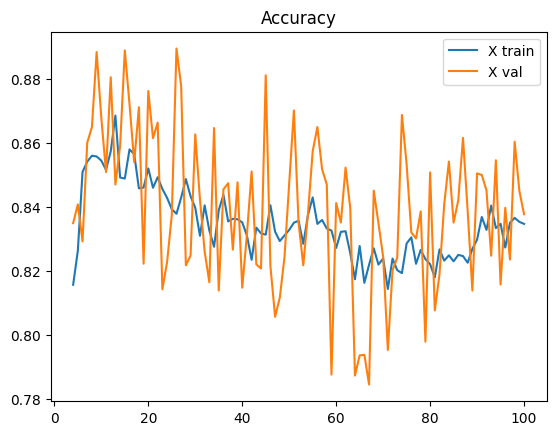

In [ ]:
plt.plot(np.arange(4, 101), history.history["accuracy"][3:], label="X train")
plt.plot(np.arange(4, 101), history.history["val_accuracy"][3:], label="X val")
plt.title("Accuracy")
plt.legend()
plt.show()

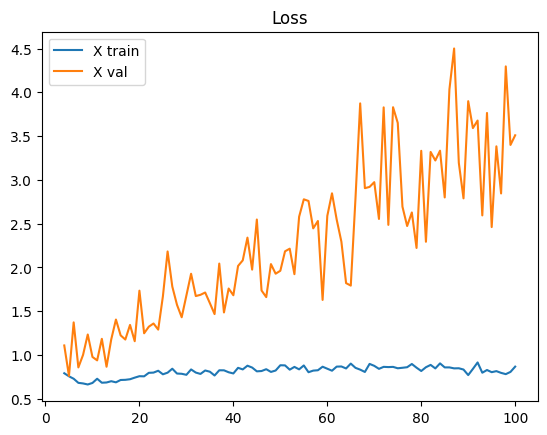

In [ ]:
plt.plot(np.arange(4,101), history.history["loss"][3:], label="X train")
plt.plot(np.arange(4,101), history.history["val_loss"][3:], label="X val")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test_ohe)

313/313 [==============================] - 1s 2ms/step - loss: 3.9887 - accuracy: 0.8193


[3.988696575164795, 0.8192999958992004]

In [ ]:
def train_model():
    model = Sequential()
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
N_EPOCHS = 100

In [ ]:
def cross_validation(k=6):
    partition_size = len(x_train) // k
    all_train_acc = []
    all_train_loss = []
    all_val_acc = []
    all_val_loss = []
    for i in range(5):
        x_train_partial = x_train[i*partition_size : (i+1)*partition_size]
        y_train_partial = y_train_ohe[i*partition_size : (i+1)*partition_size]
        x_val = np.concatenate(
            [x_train[: i*partition_size],
            x_train[(i+1)*partition_size :]],
            axis=0
        )
        y_val = np.concatenate(
            [y_train_ohe[: i*partition_size],
            y_train_ohe[(i+1)*partition_size :]],
            axis=0
        )
        model = train_model()
        history = model.fit(x=x_train_partial,
                            y=y_train_partial,
                            batch_size=32,
                            epochs=N_EPOCHS,
                            verbose=0,
                            validation_data=(x_val, y_val),
                            use_multiprocessing=True,
                            workers=2)
        all_train_acc.append(history.history["accuracy"])
        all_train_loss.append(history.history["loss"])
        all_val_acc.append(history.history["val_accuracy"])
        all_val_loss.append(history.history["val_loss"])
    return all_train_acc, all_train_loss, all_val_acc, all_val_loss

In [ ]:
all_train_acc, all_train_loss, all_val_acc, all_val_loss = cross_validation()

In [ ]:
avg_train_acc = [np.mean([x[i] for x in all_train_acc]) for i in range(N_EPOCHS)]
avg_train_loss = [np.mean([x[i] for x in all_train_loss]) for i in range(N_EPOCHS)]
avg_val_acc = [np.mean([x[i] for x in all_val_acc]) for i in range(N_EPOCHS)]
avg_val_loss = [np.mean([x[i] for x in all_val_loss]) for i in range(N_EPOCHS)]
print(avg_train_acc)
print(avg_train_loss)
all_train_acc = np.array(all_train_acc)
all_train_loss = np.array(all_train_loss)
all_val_acc = np.array(all_val_acc)
all_val_loss = np.array(all_val_loss)

[0.514079999923706, 0.6910199999809266, 0.7679800152778625, 0.7982599973678589, 0.8216400146484375, 0.8449599981307984, 0.8553799986839294, 0.8616400003433228, 0.8699200034141541, 0.8752599954605103, 0.8839000105857849, 0.8908599972724914, 0.8903200030326843, 0.8968199968338013, 0.899940013885498, 0.9040799975395203, 0.9062000036239624, 0.9056800007820129, 0.9095999956130981, 0.9113600134849549, 0.9166000008583068, 0.9101599931716919, 0.9167799949645996, 0.9199999928474426, 0.9192999958992004, 0.9202999949455262, 0.9216800093650818, 0.923420000076294, 0.92364000082016, 0.9252799987792969, 0.9234599947929383, 0.9282599925994873, 0.9299800157546997, 0.9347800016403198, 0.9326600074768067, 0.9322799921035767, 0.9334600090980529, 0.9334800124168396, 0.9354199886322021, 0.937120008468628, 0.9391800045967102, 0.9383399963378907, 0.9398400068283081, 0.939359986782074, 0.9356000065803528, 0.9391200065612793, 0.9393400073051452, 0.9392999887466431, 0.9391800045967102, 0.9389000058174133, 0.9410

In [ ]:
print(f"The average train accuracy is {np.mean(all_train_acc[:, -1]):.3f}")
print(f"Max and min train accuracy is {np.max(all_train_acc[:, -1]):.3f} and {np.min(all_train_acc[:, -1]):.3f}")
print(f"The average train loss is {np.mean(all_train_loss[:, -1]):.3f}")
print(f"Max and min train loss is {np.max(all_train_loss[:, -1]):.3f} and {np.min(all_train_loss[:, -1]):.3f}")
print(f"The average val accuracy is {np.mean(all_val_acc[:, -1]):.3f}")
print(f"Max and min val accuracy is {np.max(all_val_acc[:, -1]):.3f} and {np.min(all_val_acc[:, -1]):.3f}")
print(f"The average val loss is {np.mean(all_val_loss[:, -1]):.3f}")
print(f"Max and min val loss is {np.max(all_val_loss[:, -1]):.3f} and {np.min(all_val_loss[:, -1]):.3f}")

The average train accuracy is 0.957
Max and min train accuracy is 0.978 and 0.941
The average train loss is 0.259
Max and min train loss is 0.320 and 0.142
The average val accuracy is 0.913
Max and min val accuracy is 0.919 and 0.898
The average val loss is 4.314
Max and min val loss is 4.890 and 3.987


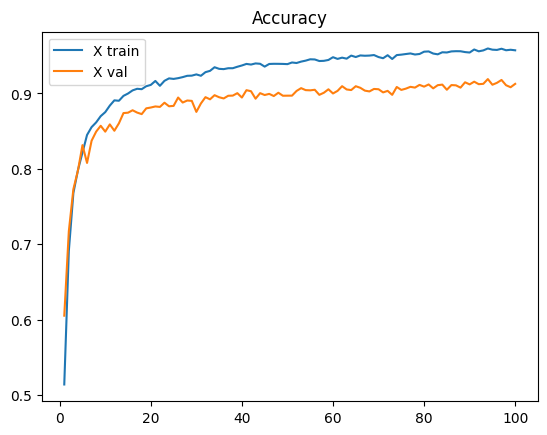

In [ ]:
plt.plot(np.arange(1, N_EPOCHS+1), avg_train_acc, label="X train")
plt.plot(np.arange(1, N_EPOCHS+1), avg_val_acc, label="X val")
plt.title("Accuracy")
plt.legend()
plt.show()

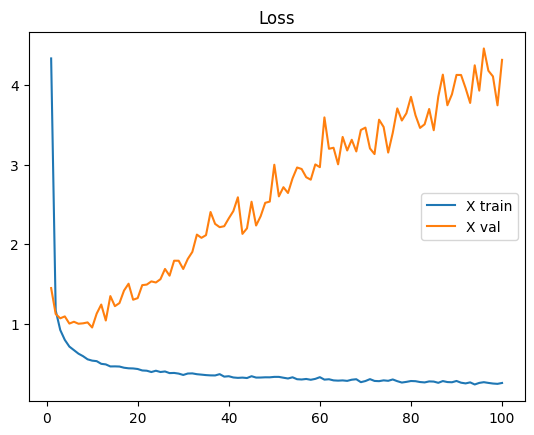

In [ ]:
plt.plot(np.arange(1, N_EPOCHS+1), avg_train_loss, label="X train")
plt.plot(np.arange(1, N_EPOCHS+1), avg_val_loss, label="X val")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
EPOCHS = 25
model = train_model()
history = model.fit(x_train, y_train_ohe, epochs=EPOCHS, batch_size=32, use_multiprocessing=True, workers=2)
test_loss, test_acc = model.evaluate(x_test, y_test_ohe)

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3926 - accuracy: 0.7918
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5538 - accuracy: 0.8820
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5355 - accuracy: 0.8888
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5183 - accuracy: 0.8969
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5187 - accuracy: 0.9001
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5003 - accuracy: 0.9068
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4878 - accuracy: 0.9061
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4991 - accuracy: 0.9063
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4836 - accuracy: 0.9075
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.482

In [ ]:
print("Test loss is", test_loss)
print(f"Test accuracy is {test_acc*100:.2f} %")

Test loss is 1.4584506750106812
Test accuracy is 90.16 %
